In [1]:
import h5py
import numpy as np
import os
%matplotlib inline  # magic,turns on inline plotting
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Set up hdf5 file path
path = '/home/stella/data/testData/preprocessed_regcvn.1000_of_1300.h5'

In [3]:
w = h5py.File(path)

In [5]:
w.keys()

<KeysViewHDF5 ['eventcalE', 'eventint', 'eventmap', 'eventrecE', 'eventtrueE', 'eventvtx', 'prong3mom', 'prongmap', 'prongrecE', 'prongtrueE']>

In [6]:
dset = w['prong3mom']

In [1]:
w['model_weights'].keys()

NameError: name 'w' is not defined

In [35]:
layername= 'xInputConv1'
w['model_weights'][layername][layername][u'kernel:0']

<HDF5 dataset "kernel:0": shape (7, 7, 1, 32), type "<f4">

In [1]:
def plot_filters(layername, w, axes):
    filters = w['model_weights'][layername][layername][u'kernel:0']
    for i in range(36):
        if i < 32:
            axes[i//6, i%6].imshow(filters[:, :, 0, i], interpolation='nearest', cmap='hot')
            axes[i//6, i%6].set_xticks([])
            axes[i//6, i%6].set_yticks([]) 
        else:
            axes[i//6, i%6].axis('off')

AttributeError: 'Figure' object has no attribute 'autoscale_None'

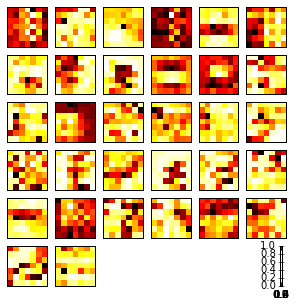

In [55]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(5, 5))
plot_filters(layername='xInputConv1', w=w, axes=axes)
plt.colorbar(fig)
fig.suptitle(r'Top-view $7 \times 7$ Filters', fontsize=15)
# fig.savefig('figures/top_conv_1.pdf')

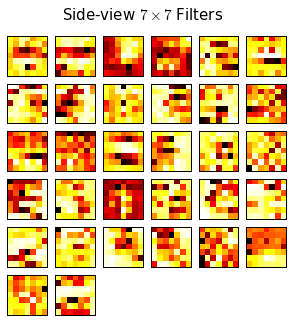

In [52]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(5, 5))
plot_filters(layername='yInputConv1', w=w, axes=axes)
fig.suptitle(r'Side-view $7 \times 7$ Filters', fontsize=15)
fig.savefig('figures/side_conv_1.pdf')